# 제 5장. 가설검정

관측된 여러 평균이나 분산의 차이가 모집단에도 있다고 해도 될지의 여부를 판정하는 것.

### 비교할 통계량에 따른 검정들

* 특정 값과 표본평균의 검정
 * 예: A 차량의 연비와 실제 운전자가 계측한 연비 간의 차이가 있을까
* 특정 비율과 표본비율의 검정
 * 예: 지지율이 30% 이하면 내각을 해산하고 싶은데, 지지율이 20%였다. 내각은 해산해야 마땅할까?
* 특정 분산과 표본분산의 검정
 * 예: 어느 생산 라인에서 제조된 과자 한 봉지의 용량이 허용 기준에 못 미칠까?
* 무상관 검정
 * 예: 운동량과 몸무게 사이에 음의 상관관계가 있을까?
* 평균차이 검정
 * 남자와 여자는 성적의 차이가 있을까?
* 등분산 검정
 * 공장 A에서 제조된 나사와 공장 B에서 제조된 나사의 길이는 차이가 있을까?
* 비율 차이 검정
 * A라인에서 제조된 액정 패널과 B라인에서 제조된 액정 패널은 수율에 차이가 있을까?

### 귀무가설과 대립가설

* 귀무가설($H_0$, null hypothesis)
 * 연구에서 주장하고자 하는 내용과 반대되는 가설
 * 차이가 없다, 효과가 없다 등
 * 검정이란 귀무가설의 반증을 하는 것
* 대립가설($H_1$, alternative hypothesis)
 * 귀무가설이 기각될 때 채택되는 가설
 * 연구에서 주장하고자 하는 내용

### 가설검정 절차

![hypothesis-testing-flow](./hypothesis_testing_flow.png)

### 특정 값과 표본평균의 검정

* `관측된 표본평균`을 `특정 값(이미 알고 있음)`과 비교하고 두 값이 같을 지, 다를 지 비교하는 것. 
* `표본의 평균검정, 한 샘플 검정, 모평균 검정(one sample t test)`이라고 불리기도 함. 기본적인 가설검정으로 회귀계수의 t검정도 이 일종.


귀무가설 - $H_0: \mu = \mu_0$ 
* 비교 대상인 특정 값과 같은 모집단에서 표본이 추출되었다고 생각한다.
* ex) 카탈로그에 나온 자동차의 연비가 실제 운전자가 계측한 연비의 평균과 같다.

대립가설 - $H_1: \mu \neq \mu_0$ 
* 특정값과는 다른 모집단에서 표본을 추출했다고 생각한다.
* ex) 카탈로그에 나온 자동차의 연비가 실제 운전자가 계측한 연비의 평균과 다르다.

**Q. 선우가 열심히 월급을 모아 연비가 11km/l로 알려진 S사의 자동차를 구매했다. 선우는 통계를 배우는 김에 실제 연비가 11km/l 정도되는 지 테스트하고자 총 30번 1l씩 충전하면서 테스트해보았다. 그 데이터는 아래와 같고, 실제 이 데이터는 통계적으로 실제 알려진 연비와 같은지 알아보자**

***disclaimer: 모분산은 알고 있다고 가정, 모분산은 1로 가정***

In [0]:
fuel_efficiency = [11.02344337, 11.1080118 , 11.29418032, 11.52743308, 10.00222319,
       10.66206335, 10.06307693, 10.28630707, 11.52504347, 10.31617873,
        9.76638109, 11.66069544, 11.65977541,  7.8178044 , 10.13415058,
       10.3049932 , 10.61410509, 11.28559714,  9.96733207, 10.5598243 ,
       12.31980721, 10.61599486, 10.64177632, 10.71008126, 10.36464511,
        9.3001418 ,  9.8140622 , 12.00938867, 11.12515665, 11.46896202]

In [0]:
%pylab inline
plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


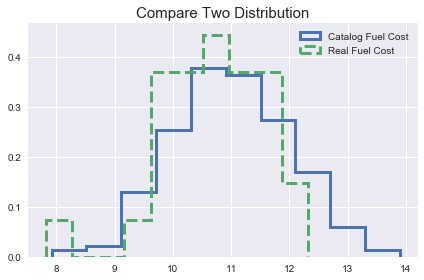

In [0]:
simulated_values = np.random.normal(11, size=1000)

# 평균이 11로 시뮬레이션된 정규분포
plt.hist(simulated_values, 
         density=True, 
         histtype='step', 
         linewidth=3, 
         ls='-', 
         label='Catalog Fuel Cost')

# 실제 계측된 표본의 분포
plt.hist(fuel_efficiency, 
         density=True, 
         histtype='step', 
         linewidth=3, 
         ls='--',
         label='Real Fuel Cost')
plt.title('Compare Two Distribution', size=15)
plt.legend()
plt.tight_layout()

### 검정하기

비교 대상이 되는 `특정 값`과 `관측된 표본의 평균`의 차이가 오차 범위 내라고 말할 수 있는지 판단.

1. 만약 오차라고 말할 수 없을 정도로 차이가 크다면 $\rightarrow$ 귀무가설 기각
2. 만약 오차범위라고 말할 수 있을 정도의 차이라면 $\rightarrow$ 귀무가설 채택

### 판정하기

* **"이것보다도 표본평균이 다르다면, 귀무가설을 기각한다"**고 하는  한계값을 `유의수준`으로 계산.
* 한계값: $1.96 \times \frac{\sigma}{\sqrt{n}} $

### 유의수준

* 어느정도 정확도로 가설을 기각할지 `유의수준`(확률: $\alpha$)으로 해서 정해둔다.
* `양측검정`과 `단(편)측검정`이 있고, 유의수준은 보통 `10%, 5%, 1%`로 정한다.
* `양측검정`, `95%`의 경우 한쪽에 `2.5%`씩 총 `5%`를 `기각역`으로 설정한다.
* 이는 `제 1종 과오(1종 오류)`의 확률로 다시 말할 수 있다.

### 양측검정과 단측검정

* 주로 양측검정을 사용하지만 `편측검정`을 사용하기도 한다. 그 사용 경우는 아래와 같다.
 1. `대립 가설의 분포`가 `귀무가설의 분포`보다 커진다는 것을 알고 있는 경우
 2. 한쪽 방향의 유의차만 관심이 있는 경우(대립가설: $\mu < \mu_0$ or $\mu > \mu_0$).
* 편측검정은 양측검정보다 귀무가설을 기각하기 쉽다.
 * **유의수준 5%를 가정**했을 때, 양측검정은 기각역이 `2.5%`인 반면에 단측검정은 기각역이 `5%`이므로.

In [0]:
from scipy.stats import norm

**양측검정**

In [0]:
alpha = 0.05

mu = 11

stderr = 1 / np.sqrt(30)

lower_lmt, upper_lmt =  mu - abs(norm.ppf(alpha / 2)) * stderr, mu + abs(norm.ppf(alpha / 2)) * stderr
print(f'lower is {lower_lmt:.2f}, upper is {upper_lmt:.2f}')
hypothesis_result = lower_lmt <= np.mean(fuel_efficiency) <= upper_lmt
print(f'Null hypothesis is {hypothesis_result}')

lower is 10.64, upper is 11.36
Null hypothesis is True


**단측검정**

가설: 실제 계측한 연비가 카탈로그 연비보다 낮을 것 이다.

In [0]:
alpha = 0.05

mu = 11

stderr = 1 / np.sqrt(30)

lower_lmt =  mu - abs(norm.ppf(alpha)) * stderr

print(f'lower is {lower_lmt:.2f}')
hypothesis_result = lower_lmt <= np.mean(fuel_efficiency)
print(f'Null hypothesis is {hypothesis_result}')

lower is 10.70
Null hypothesis is False


In [0]:
lower_lmt <= np.mean(fuel_efficiency)

False

**모본산을 모를 때**

* t 분포를 활용.
* z분포보다 넓은 분포로, 귀무가설이 채택되기 쉽다.
* 한계값: `t 값`

In [0]:
from scipy.stats import t

In [0]:
alpha = 0.05

mu = 11
df = len(fuel_efficiency) - 1
stderr = np.std(fuel_efficiency) / np.sqrt(df)
critical_value = t.ppf(alpha / 2, df)

lower_lmt, upper_lmt = critical_value, abs(critical_value)
print(f'1. lower is {lower_lmt:.2f}, upper is {upper_lmt:.2f}')

t_value = (np.mean(fuel_efficiency) - mu) / stderr
print(f'2. t value is {t_value}')
hypothesis_result = lower_lmt <= t_value  <= upper_lmt
print(f'3. Null hypothesis is {hypothesis_result}')

1. lower is -2.05, upper is 2.05
2. t value is -2.0364786416406444
3. Null hypothesis is True


In [0]:
from scipy.stats import ttest_1samp
ttest_1samp(fuel_efficiency, popmean=11)

Ttest_1sampResult(statistic=-2.0364786416406444, pvalue=0.05092472266259407)

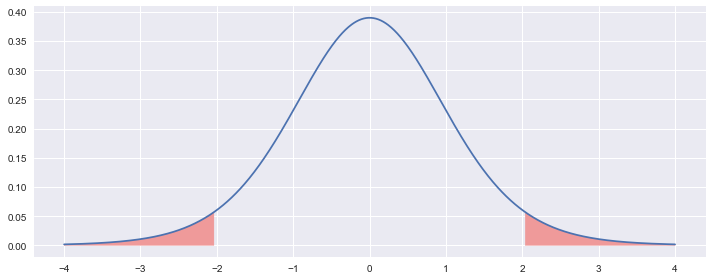

In [0]:
_, ax = plt.subplots(figsize=(10, 4))

x = np.linspace(-4, 4, 1000)

data = t.pdf(x, mu)
ax.plot(x, data)

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=(kde_x < t_value) | (kde_x > abs(t_value)), color='#EF9A9A')
plt.tight_layout()

In [0]:
sum(data[(kde_x <= t_value)]) * 2 / len(x) * (kde_x.max() - kde_x.min())

0.06464885836273201

AI(도형): 왜 P-value가 다른지 조사할 것.

읽을 거리

[미국통계학회 성명서](https://www.amstat.org/asa/files/pdfs/P-ValueStatement.pdf)

### 가설검정의 두 과오(오류)

* 제 1종 오류(과오)
 * `차이가 없는데, 차이가 있다고 판정하는 것`
 * 귀무가설이 채택되어야 하나, 대립가설이 채택됨.
 * $\alpha$ 라고 표기함.
* 제 2종 오류(과오)
 * `차이가 있는데, 없다고 판정하는 것`
 * 귀무가설이 기각되어야 하나, 채택됨.
 * $\beta$ 라고 표기함.

### 검정력(검출력)

* 검출력이란 `차이가 있는 경우에 정확히 차이가 있다는 판정을 할 수 있는 능력`
* 즉, 제 2종 오류를 범하지 않을 않을 확률로 $1 - \beta$ 로 계산.

![alt-text](https://t1.daumcdn.net/cfile/tistory/99DE63485BEE0A5C34)

### 특정 값(모비율)과 표본비율 검정

**가설**

* 귀무가설 $H_0: p = p_0$ 표본비율의 모수와 특정 모비율에는 `차이가 없다`.
* 대립가설 $H_1: p \neq p_0$ 표본비율의 모수와 특정 모비율에는 `차이가 있다`.

**검정 통계량**

* 대표본($n \geq 100$)일 때, 표본비율 $\hat{p}$는 정규분포를 따른다.
* 모표준오차 $\sqrt{\frac{p_0(1-p_0)}{n}}$

**한계값**

* $p_0 \pm z_{\alpha / 2} \sqrt{\frac{p_0(1-p_0)}{n}}$

In [0]:
import scipy as sp

In [0]:
np.random.seed(0)

N = 100
mu_0 = 0.35
x = sp.stats.bernoulli(mu_0).rvs(N)
n = np.count_nonzero(x)

In [0]:
sp.stats.binom_test(n, N)

0.00018314322488235352

다음 코드를 실행하면 어느 식당의 매출과 팁(tip) 데이터를 구할 수 있다.
```python
import seaborn as sns
tips = sns.load_dataset("tips")
```
하나의 레코드(행)이 한 명의 손님을 나타낸다고 가정하자. 열마다 성별(sex), 흡연유무(smoker), 점심/저녁(time) 등을 나타내는 데이터가 있다.

이항 검정을 사용하여 다음 문제를 풀어라.


**1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?**

**2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?**

[출처: 데이터사이언스스쿨](https://datascienceschool.net/view-notebook/14bde0cc05514b2cae2088805ef9ed52/)

In [0]:
import seaborn as sns
tips = sns.load_dataset("tips")

1. 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [0]:
female_smoker = (tips[tips.sex == 'Female'].smoker == 'Yes').sum()
sp.stats.binom_test(female_smoker, len(tips[tips.sex == 'Female']))

0.031418110233846136

2. 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [0]:
condition = (tips.sex == 'Female') & (tips.time == 'Dinner')
dinner_female_smoker = (tips[condition].smoker == 'Yes').sum()
sp.stats.binom_test(dinner_female_smoker, len(tips[condition]))

0.4884556693798922

### 특정 값(모분산)과 표본분산 검정

관측된 표본분산을 특정 분산 값과 비교하고 그것이 다른지 $\chi^2$ 분포를 사용해 판정.

**가설**

* 귀무가설 $H_0: \sigma^2 = \sigma_0^2$ 표본분산의 모수(모분산)와 특정 모분산에는 `차이가 없다`.
* 대립가설 $H_1: \sigma^2 \neq \sigma_0^2$ 표본분산의 모수(모분산)와 특정 모분산에는 `차이가 있다`.

**검정통계량**

$\chi^2 = \frac{(n-1)\times\hat{\sigma}^2}{\sigma_0^2}$ or $\frac{n\times s^2}{\sigma_0^2}$

Python: `from scipy.stats import chisquare; chisquare(data, ddof=1)`

**귀무가설 판정**

엑셀 기준

* 상한값: `= CHISQ.INV.RT(alpha / 2, n - 1)`
* 하한값: `= CHISQ.INV(alpha / 2, n - 1)`

Python 기준

* 상한값: `chi2.ppf(1 - alpha / 2, 29)`
* 하한값: `chi2.ppf(alpha / 2, 29)`

In [0]:
from scipy.stats import chi2

In [0]:
alpha = 0.05

chi2.ppf(1 - alpha / 2, 29), chi2.ppf(alpha / 2, 29)

(45.72228580417452, 16.047071695364906)

In [0]:
N = 100
K = 4
mu_0 = np.array([0.35, 0.30, 0.20, 0.15])
np.random.seed(0)
x = np.random.choice(K, N, p=mu_0)
n = np.bincount(x, minlength=K)
n

array([37, 32, 20, 11])

In [0]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=16.56, pvalue=0.0008703471978912127)

**4면체 주사위를 3번 던졌다. 만약 3번 모두 1이 나왔다면 주사위가 공정하다는 귀무 가설의 유의확률은 얼마인가?**

In [0]:
sp.stats.chisquare(np.array([0, 3, 0, 0]))

Power_divergenceResult(statistic=9.0, pvalue=0.02929088653488826)

**예를 들어 XX 스쿨 수업을 들었는가의 여부가 나중에 대학원에서 머신러닝 수업의 학점과 상관관계가 있는지를 알기 위해 데이터를 구한 결과가 다음과 같다고 하자.**

**XX 스쿨 수업을 듣지 않은 경우 즉, 𝑋 가 0이면 A, B, C 학점( 𝑌 값)을 받은 학생의 분포가 `4,16,20` 이다.
XX 스쿨 수업을 들은 사람의 경우 즉, 𝑋 가 1일 때 A, B, C 학점( 𝑌 값)을 받은 학생의 분포가  `23,18,19` 이다.
이 결과로부터 XX 스쿨 수업을 들었는가의 여부가 머신러닝 수업의 학점과 상관관계가 있다고 말할 수 있는가?**

In [0]:
import pandas as pd

scores = pd.DataFrame(data=[[4, 16, 20], [23, 18, 19]], index=['X=0', 'X=1'], columns=['A', 'B', 'C'])

In [0]:
scores

,A,B,C
X=0,4,16,20
X=1,23,18,19


In [0]:
sp.stats.chi2_contingency(scores)

(9.910060890453046, 0.00704786570249751, 2, array([[10.8, 13.6, 15.6],
        [16.2, 20.4, 23.4]]))

### 무상관검정

**가설**

* 귀무가설 $H_0: \rho = 0$ 참된 상관계수(모상관계수)는 `제로이다`. $\rightarrow$ `무상관`
* 대립가설 $H_1: \rho \neq 0$ 참된 상관계수(모상관계수)는 `제로가 아니다`. $\rightarrow$ `상관 있음`

**검정통계량(t분포)**

귀무가설 하, 스튜던트화한 표본상관계수 $t_r$은 자유도 `n-2`인 t분포를 따른다.

* $t_r = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$

**귀무가설의 판정**

엑셀 기준

* 한계값: `T.INV.2T(alpha, n - 2)`

Python 기준

* 한계값: `t.ppf(alpha / 2, n - 2)`

### 평균차이검정

* 두 그룹의 평균을 비교해 이들의 차이가 모집단에도 있다고 해도 좋을지 여부를 확률로 판정

**평균차이 검정 종류**

* 대응이 없는 두 집단: 다른 두 집단을 두 조건으로 측정 후 평균 비교(예. 성별에 따른 평균 차이)
* 대응이 있는 두 집단: 동일 집단을 두 조건으로 측정 후 평균 비교(예. 약의 효과 연구)

**표본평균 차이의 분포와 가설**

* 기존에는 모평균(이미 알고 있는 분포)과 표본평균을 비교했기 때문에 비교가 쉬웠음.
* 두 집단을 비교하는 경우에는 둘다 모평균을 알 수 없으므로 비교가 어려움.

따라서, `평균의 차이`를 확률변수로 가정함.

귀무가설 - $H_0: \mu_1 = \mu_2$ 
* 두집단의 모평균에 차이가 없다.
* 평균이 상수인 `O`가 된다.

대립가설 - $H_1: \mu_1 \neq \mu_2$ 
* 두집단의 모평균에 차이가 있다.
* 평균이 $\bar{x}_1 - \bar{x}_2$가 된다.

**분산의 가법성**

* 주의사항. 표본평균 차이 분포에서 모평균은 두 `평균의 차`이지만, 분산은 `두 오차분산의 합`의 제곱근이 된다.

* 집단 1의 표준오차: $\sqrt{\sigma_{\bar{x_1}}^2}$
* 집단 2의 표준오차: $\sqrt{\sigma_{\bar{x_2}}^2}$
* 집단 1 - 집단 2의 표준오차: $\sqrt{\sigma_{\bar{x_1}}^2 + \sigma_{\bar{x_2}}^2}$

**검정통계량(z 분포)**

$Z_{\bar{x_1} - \bar{x_2}} = \frac{(\bar{x_1} - \bar{x_2})-(\mu_1 - \mu_2)}{\sqrt{\sigma_{\bar{x_1}}^2 + \sigma_{\bar{x_2}}^2}} = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\sigma^2(\frac{1}{n_1} + \frac{1}{n_2})}}$

* 전개 근거: 귀무가설이 참이라는 전제 하에 같은 분산, 모평균의 차는 0.

**검정통계량(t 분포)**

$$t_{\bar{x_1} - \bar{x_2}} = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{\hat{\sigma}^2(\frac{1}{n_1} + \frac{1}{n_2})}}$$

$$\hat{\sigma}^2 = \frac{(n_1 - 1){\hat{\sigma}}_1^2 + (n_2 - 1)\hat{\sigma}_2^2}{(n_1-1)+(n_2-1)}$$

* 자유도
 * 두 집단이 다른 크기인 경우: $(n_1 - 1) + (n_2 - 1)$
 * 두 집단이 같은 크기인 경우: $2(n-1)$
 
 **Welch의 검정**
 
 기존 방법들은 `등분산(분산이 같음)`을 전제로 함. 따라서 welch의 경우에는 분산이 다름을 가정하고 t검정과 유사한 검정이 가능하도록 함. 이를 위해 복잡한 자유도를 계산.
 
 $$t'_{\bar{x_1} - \bar{x_2}} = \frac{\bar{x_1} - \bar{x_2}}{\sqrt{(\frac{\hat{\sigma}_1^2}{n_1} + \frac{\hat{\sigma}_2^2}{n_2})}}$$
 
$$\text{df} = \frac{(\frac{\hat{\sigma}_1^2}{n_1} + \frac{\hat{\sigma}_2^2}{n_2})^2}{\frac{\hat{\sigma}_1^4}{n_1^2(n_1 - 1)} + \frac{\hat{\sigma}_2^4}{n_2^2(n_2 - 1)}}$$


**1반과 2반 학생 들의 성적이 각각 다음과 같다고 가정하자.**

**1반 : 80점, 75점, 85점, 50점, 60점, 75점, 45점, 70점, 90점, 95점, 85점, 80점. 평균 74.1점**

**2반 : 80점, 85점, 70점, 80점, 35점, 55점, 80점. 평균 69.2점**

**1반의 실력이 2반보다 좋다고 이야기 할 수 있는가?**

In [0]:
class_1 = [80, 75, 85, 50, 60, 75, 45, 70, 90, 95, 85, 80]
class_2 = [80, 85, 70, 80, 35, 55, 80]

In [0]:
sp.stats.ttest_ind(class_1, class_2)

Ttest_indResult(statistic=0.623010926550264, pvalue=0.5415458608473267)

In [0]:
np.std(class_1), np.std(class_2)

(14.837078178970714, 16.781914463529613)

In [0]:
sp.stats.ttest_ind(class_1, class_2, equal_var=False)

Ttest_indResult(statistic=0.596519621317167, pvalue=0.562790180213766)

### 등분산 검정(F 검정)

* 두 그룹의 분산이 같은지 아닌지를 판정
* 등분산이라는 조건에서는 두개의 불편분산의 비가 F분포를 따른다.


* $H_0: \sigma_0^2 = \sigma_1^2$, 두 집단의 모분산에는 **차이가 없다**
* $H_1: \sigma_0^2 \neq \sigma_1^2$, 두 집단의 모분산에는 **차이가 있다**

여기서 F값은 항상 분자가 더 큰 값이 오도록 **약속**한다 $\rightarrow$ 즉, 분포 상의 상측(오른쪽) 분포만을 고려하여 계산한다.

In [0]:
from scipy.stats import f_oneway

In [0]:
f_oneway(class_1, class_2)

F_onewayResult(statistic=0.3881426146010187, pvalue=0.5415458608473258)

### 평균차이검정(대응 집단이 있는 경우)

* 대응표본 평균차이검정은 두 조건 하에서 **동일 개체**로부터 측정한 평균의 차이가 모집단에서도 있다고 할 정도로 좋은지 여부를 판정.


* 예시

| 피험자 | 투약 전($X_1$) | 투약 후($X_2$) |     차이 $d$ |
|:------:|:--------------:|:--------------:|:-----------------:|
|    A   |       180      |       120      |  60 |
|    B   |       200      |       150      | 50 |
|    C   |       250      |       150      | 100 |


* 대응이 없는 경우, "표본평균의 차이" 분포였다면 대응이 있는 경우, "개별의 차이" 표본분포로 이해한다.

In [0]:
from scipy.stats import ttest_rel

In [0]:
ttest_rel([180, 200, 250], [120, 150, 150])

Ttest_relResult(statistic=4.58257569495584, pvalue=0.04446691409409084)

In [0]:
d_set = list()

for x1, x2 in zip([180, 200, 250], [120, 150, 150]):
    d_set.append(x1 - x2)

In [0]:
t_d = np.mean(d_set) / (np.std(d_set, ddof=1) / np.sqrt(3))

In [0]:
t_d

4.58257569495584